In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from sklearn import preprocessing
os.chdir("C:/Users/Ma/Desktop/document/企业经营退出风险预测/analysis")

# data = pd.read_csv('data.csv',encoding='gb2312')
entbase = pd.read_csv('1entbase.csv',encoding='gb2312')
alter = pd.read_csv('2alter.csv',encoding='utf8')
branch = pd.read_csv('3branch.csv',encoding='gb2312')
invest = pd.read_csv('4invest.csv',encoding='gb2312')
right = pd.read_csv('5right.csv',encoding='gb2312')
project = pd.read_csv('6project.csv',encoding='gb2312')
lawsuit = pd.read_csv('7lawsuit.csv',encoding='gb2312')
breakfaith = pd.read_csv('8breakfaith.csv',encoding='gb2312')
recruit = pd.read_csv('9recruit.csv',encoding='gb2312')

# 企业基本信息

In [2]:
# ----------------------------------------------------注册资本缺失值填充-----------------------------------------------#
# scaler = preprocessing.MinMaxScaler()
entbase['ZCZB']=entbase['ZCZB'].groupby([entbase.ETYPE,entbase.HY]).apply(lambda g:g.fillna(g.mean()))
entbase['MPNUM'] = entbase['MPNUM'].fillna(0)
# entbase['MPNUM'] = scaler.fit_transform(entbase.MPNUM)
entbase['INUM'] = entbase['INUM'].fillna(0)
entbase['FINZB'] = entbase['FINZB'].fillna(0)
entbase['FSTINUM'] = entbase['FSTINUM'].fillna(0)
entbase['TZINUM'] = entbase['TZINUM'].fillna(0)
#-------------------------------------------------------构造新特征-------------------------------------------------------#
entbase['num'] = entbase['MPNUM']+ entbase['INUM']+entbase['FINZB']+entbase['FSTINUM']+entbase['FSTINUM']+entbase['TZINUM']
entbase['hyty'] = (entbase.HY.astype('str') + entbase.ETYPE.astype('str')).astype('int')
entbase['year_imp']= 1/(entbase['RGYEAR'] - entbase.RGYEAR.min()+1)
entbase['id_imp']= 1/(entbase['EID'] - entbase.EID.min()+1)
entbase['old'] = 2016 - entbase.RGYEAR
# entbase['ZB'] = entbase.ZCZB + entbase.FINZB
data = entbase
data.head()

,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,num,hyty,year_imp,id_imp,old
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,8.0,877,0.020000,0.000031,16
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,3.0,517,0.018868,0.000003,13
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,5.0,757,0.015873,0.000095,3
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,11.0,757,0.015625,0.000004,2
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,10.0,757,0.017241,0.000002,8


In [4]:
# 保存训练集
train = pd.read_csv('train.csv',encoding='gb2312')
data_train = pd.merge(left=train,right=data,left_on='EID',right_on='EID',how='left')

In [5]:
data_train.head()

,EID,TARGET,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,num,hyty,year_imp,id_imp,old
0,309,0,2001,87,10.0,17,0.0,2.0,0.0,0.0,0.0,2.0,8717,0.019608,0.003236,15
1,356,0,2011,50,100.0,7,0.0,1.0,0.0,0.0,0.0,1.0,507,0.016393,0.002809,5
2,383,0,1999,43,3.0,17,1.0,2.0,0.0,1.0,0.0,5.0,4317,0.020408,0.002611,17
3,399,0,2011,75,50.0,7,1.0,1.0,0.0,0.0,0.0,2.0,757,0.016393,0.002506,5
4,619,0,2008,74,200.0,7,0.0,2.0,0.0,0.0,0.0,2.0,747,0.017241,0.001616,8


### 降维可视化，企图发现一些离群点

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


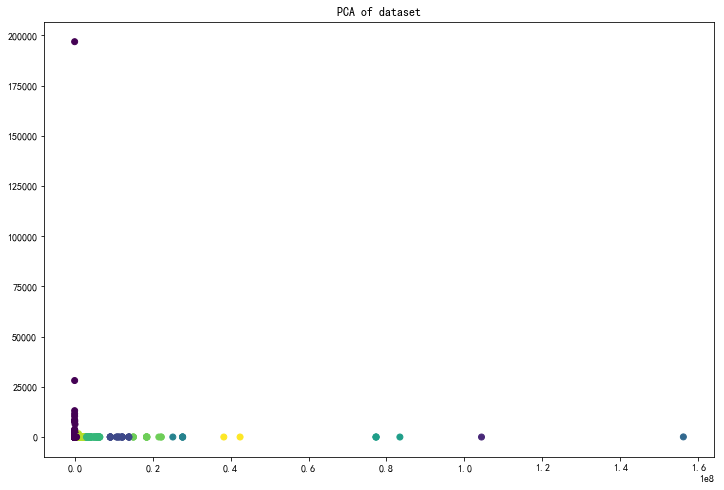

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler,RobustScaler

train = data_train.drop('TARGET',axis=1)
train = np.array(train)
labels = data_train.TARGET
# 标准化
# scaler = StandardScaler()
scaler = RobustScaler()
train = scaler.fit_transform(train)
y_pred = KMeans(n_clusters=10).fit_predict(train)
# kpca = KernelPCA(eigen_solver='arpack',n_components=2)

# X_kpca = kpca.fit_transform(train)

pca = PCA(n_components=2)
X_r = pca.fit_transform(train)

plt.figure()
plt.scatter(X_r[:,0], X_r[:,1],c=y_pred)
plt.legend()
plt.title('PCA of dataset')
plt.show()

In [72]:
i = 7
data_train['TARGET'][y_pred==i].value_counts()/data_train['TARGET'][y_pred==i].shape[0]

0    1.0
Name: TARGET, dtype: float64

In [136]:
# plt.figure(figsize=(6,4))
# plt.hist(entbase.ZCZB,range=(entbase.ZCZB.min(),1000),bins=100)
# plt.show()

# 企业变更

In [28]:
# alter = pd.read_csv('2alter.csv',encoding='utf8')
alter.head()

,EID,ALTERNO,ALTDATE,ALTBE,ALTAF,alter_year,alter_month
0,350,12,2015-02,NaN,NaN,2015,2
1,399,05,2014-01,10,50,2014,1
2,399,12,2015-05,NaN,NaN,2015,5
3,399,12,2013-12,NaN,NaN,2013,12
4,399,27,2014-01,10,50,2014,1


In [22]:
alter = pd.read_csv('2alter.csv',encoding='utf8')
#---------------------------------------------------------数据清洗以及特征构造----------------------------------------------------#

# --------------------------------------------------------去重，有很多重复的------------------------------------------------------#
alter.drop_duplicates(inplace=True)

# ----------------------------------------------------去除字符中的万元和小数点---------------------------------------------------#
alter.ALTBE = alter.ALTBE.astype('str')
alter.ALTBE = alter.ALTBE.apply(lambda x :x.strip('万元').split('.')[0] if ~pd.isnull(x) else x)
alter.ALTAF = alter.ALTAF.astype('str')
alter.ALTAF = alter.ALTAF.apply(lambda x :x.strip('万元').split('.')[0] if ~pd.isnull(x) else x)

# ----------------------------------------------------变动年 和 月-------------------------------------------------------------#
alter['alter_year'] = alter.ALTDATE.apply(lambda x : x.split('-')[0]).astype('int')
alter['alter_month'] = alter.ALTDATE.apply(lambda x : x.split('-')[1]).astype('int')
# 是否最近一年(2015年)变动
alter['alter_1year'] = np.where(alter.alter_year>2014,1,0)
# 企业每个类型的变化次数（所有年份）
alter_num = alter.groupby(['EID','ALTERNO'],as_index=False).agg({'ALTDATE':'count'}).pivot('EID','ALTERNO','ALTDATE').fillna(0)
alter_num['alter_total'] = alter_num.apply(lambda x :x.sum(),axis=1)
# -------------------------------------------------企业每个类型的变化次数（近一年）---------------------------------------------#
alter_num1 = alter.groupby(['EID','ALTERNO'],as_index=False).agg({'alter_1year':'sum'}).pivot('EID','ALTERNO','alter_1year').fillna(0)
alter_num1['alter_1total'] = alter_num1.apply(lambda x :x.sum(),axis=1)
alter_num1.rename(columns=lambda x :'1year'+str(x),inplace=True)
# ------------------------------------------------变动年份的权重，越近，权重越大-------------------------------------------------#
alter['alter_year_impor'] = (1/(1+alter['alter_year']-alter['alter_year'].min())).fillna(0)
alter_year_impor = alter.groupby('EID').agg({'alter_year_impor':'mean'})


# ----------------------------------------------------增加新特征，资本变动差------------------------------------------------------#
alter.ALTBE[alter.ALTBE == 'null'] = np.nan
alter.ALTAF = alter.ALTAF.apply(lambda x : float(x) if ~pd.isnull(x) else x)
alter.ALTBE = alter.ALTBE.apply(lambda x : float(x) if ~pd.isnull(x) else x)
alter['alter_zczb'] = (alter.ALTAF - alter.ALTBE)

# 只挑选变动为5的企业，并且最近变动的，去重,
alter_5 = alter.loc[alter.ALTERNO == '05'][['EID','alter_zczb','alter_year','alter_month']]
alter_5.sort_values(by=['alter_year','alter_month'],inplace=True,ascending=False)
alter_5.drop_duplicates('EID',inplace=True)
del(alter_5['alter_month'])
# del(alter_5['alter_year'])
# 还有挑选出企业的原始资本
alter_ori_zb = alter.loc[alter.ALTERNO == '05'][['EID','ALTBE','alter_year','alter_month']]
alter_ori_zb.sort_values(by=['alter_year','alter_month'],ascending=True,inplace=True)
alter_ori_zb.drop_duplicates('EID',inplace=True)
alter_ori_zb.rename(columns={'ALTBE':'ori_zb'},inplace=True)
del(alter_ori_zb['alter_year'])
del(alter_ori_zb['alter_month'])

# ------------------------------------------------------合并----------------------------------------------------------------#
# 资本变动的表
data = pd.merge(left=data,right=alter_5,left_on='EID',right_on='EID',how='left')
data['alter_zczb'].fillna(0,inplace=True)
data['alter_year'].fillna(2016,inplace=True)
# 变动数量的表
data = pd.merge(left=data,right=alter_num,left_on='EID',right_index=True,how='left').fillna(0)
# 近一年变动
data = pd.merge(left=data,right=alter_num1,left_on='EID',right_index=True,how='left').fillna(0)
# 判断是否有变动的特征
data['alter_if'] = np.where(data.alter_total>0,1,0)
# 变动年份的重要性
data = pd.merge(left=data,right=alter_year_impor,left_on='EID',right_index=True,how='left').fillna(0)
# 原始资本表
data = pd.merge(left=data,right=alter_ori_zb,left_on='EID',right_on='EID',how='left')
data['ori_zb'].fillna(data['ZCZB'],inplace=True)
data.head()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,...,1year12,1year13,1year14,1year27,1year99,1yearA_015,1yearalter_1total,alter_if,alter_year_impor,ori_zb
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,100.0
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,50.0
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,100.0
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,9900.0
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,50.0


# 企业分支机构

In [53]:
branch = pd.read_csv('3branch.csv',encoding='gb2312')
branch.head()

,EID,TYPECODE,IFHOME,B_REYEAR,B_ENDYEAR
0,405460,br120022,0,1993,2008.0
1,138728,br210454,1,2002,NaN
2,405460,br60051,0,2011,NaN
3,247652,br210455,1,2014,NaN
4,26268,br30155,0,2014,NaN


In [44]:
# branch.B_REYEAR.value_counts()

In [23]:
#------------------------------------------------------------清洗&特征构造------------------------------------------------------#
# 去重，此表无缺失值
branch.drop_duplicates(inplace=True)
# 子机构成立和倒闭年份的重要性
branch['bra_end_year_imp'] = (1/(branch.B_REYEAR.max() - branch.B_REYEAR+1)).fillna(0)
branch['bra_reyear_impor'] = (1/(branch.B_REYEAR.max() - branch.B_REYEAR+1)).fillna(0)

# 计算子机构个数和停业比例
branch_num = branch.groupby(['EID','IFHOME'],as_index=False).agg({'TYPECODE':'count'}).pivot('EID','IFHOME','TYPECODE').fillna(0)
branch_num['bra_total'] = branch_num.apply(lambda x: x.sum(),axis=1)
branch_end = branch.groupby(['EID','IFHOME'],as_index=False).agg({'B_ENDYEAR':'count'}).pivot('EID','IFHOME','B_ENDYEAR').fillna(0)
branch_end['bra_end_total'] = branch_end.apply(lambda x: x.sum(),axis=1)
branch_data = pd.merge(branch_num,branch_end,left_index=True,right_index=True,how='left')
branch_data['bra_pro'] = np.where(branch_data['bra_total']>0,branch_data['bra_end_total']/branch_data['bra_total'],0)
## 近一年
# 是否最近两年(2015年)成立或倒闭
branch['1year_be'] = np.where(branch.B_REYEAR>2013,1,0)
branch['1year_end'] = np.where(branch.B_ENDYEAR>2013,1,0)
branch_num1 = branch.groupby(['EID','IFHOME'],as_index=False).agg({'1year_be':'sum'}).pivot('EID','IFHOME','1year_be').fillna(0)
branch_num1['bra_1total'] = branch_num1.apply(lambda x: x.sum(),axis=1)
branch_end1 = branch.groupby(['EID','IFHOME'],as_index=False).agg({'1year_end':'sum'}).pivot('EID','IFHOME','1year_end').fillna(0)
branch_end1['bra_end_1total'] = branch_end1.apply(lambda x: x.sum(),axis=1)
branch_data1 = pd.merge(branch_num1,branch_end1,left_index=True,right_index=True,how='left')
branch_data1['bra_pro1'] = np.where(branch_data1['bra_1total']>0,branch_data1['bra_end_1total']/branch_data1['bra_1total'],0)

# 子机构成立的平均年份和关停的平均年份
# 填充缺失值
# branch['B_ENDYEAR'].fillna(2015,inplace=True)
# 机构年龄影响
branch['branch_old'] = branch.B_ENDYEAR - branch.B_REYEAR
bran_avg_year = branch.groupby('EID').agg({'bra_end_year_imp':'sum','bra_reyear_impor':'sum','B_ENDYEAR':'mean','branch_old':'mean'})

# bran_avg_year = np.rint(bran_avg_year)
# 子机构关停与成立时间差，越小说明
# bran_avg_year['branch_old'] = (bran_avg_year.B_ENDYEAR - bran_avg_year.B_REYEAR).fillna(0)
branch_data = pd.merge(left=branch_data,right=bran_avg_year,left_index=True,right_index=True,how='left')
# --------------------------------------------------------------合并------------------------------------------------------------------#
branch_data.duplicated()
data = pd.merge(left=data,right=branch_data,left_on='EID',right_index=True,how='left',sort=False).fillna(0)
data = pd.merge(left=data,right=branch_data1,left_on='EID',right_index=True,how='left',sort=False).fillna(0)

data['branh_if']= np.where(data.EID.isin(branch.EID),1,0)
data.head()

,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,...,B_ENDYEAR,branch_old,0_x_y,1_x_y,bra_1total,0_y_y,1_y_y,bra_end_1total,bra_pro1,branh_if
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,...,2012.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# 企业权利信息

In [16]:
# right = pd.read_csv('5right.csv',encoding='gb2312')
right.head()

,EID,RIGHTTYPE,TYPECODE,ASKDATE,FBDATE,ask_year
0,3102,20,pno13889,2010-11,2011-05,2010
1,3102,20,pno201544,2010-11,2011-05,2010
2,3728,11,pno134933,2015-06,NaN,2015
3,3728,11,pno97198,2015-06,NaN,2015
4,3728,11,pno97189,2015-06,NaN,2015


In [5]:
#---------------------------------------------------------数据清洗以及特征构造----------------------------------------------------#
right['right_code']=right['TYPECODE'].apply(lambda x:x[:3] if x[0].isalpha() else  'digit')
right['ask_year'] = right['ASKDATE'].apply(lambda x :x.split('-')[0]).astype('int')
## ------------------------------------------------------------近一年--------------------------------------------------------------#
# 是否最近两年(2014年)申请
right['ask_2year'] = np.where(right.ask_year>2013,1,0)

# 年份的重要性
right['right_year_imp'] = 1/(1+right.ask_year.max() - right.ask_year.min())
# 权利类型的数量
right_num = right.groupby(['EID','RIGHTTYPE'],as_index=False).agg({'TYPECODE':'count'}).pivot('EID','RIGHTTYPE','TYPECODE').fillna(0)
right_num['total'] = right_num.apply(lambda x :x.sum(),axis=1)
# right_num.rename(columns={'11':'right_11','12':'right_12','20':'right_20','30':'right_30','40':'right_40','50':'right_50',
#                           '60':'right_60'},inplace=True)
right_num.rename(columns=lambda x : 'right_'+str(x))
# ----------------------------------------------------------近两年权利类型---------------------------------------------------------#
right_num2 = right.groupby(['EID','RIGHTTYPE'],as_index=False).agg({'ask_2year':'sum'}).pivot('EID','RIGHTTYPE','ask_2year').fillna(0)
right_num2['total2'] = right_num2.apply(lambda x :x.sum(),axis=1)
right_num2.rename(columns=lambda x : 'right_'+str(x))
# 权利编码的数量
right_code = pd.crosstab(right.EID,right.right_code)
right_num['right_code_total'] = right_num.apply(lambda x :x.sum(),axis=1)

# 年份求平均
right_year = right.groupby('EID').agg({'right_year_imp':'mean'})
# --------------------------------------------------------------合并------------------------------------------------------------------#
data = pd.merge(left=data,right=right_num,left_on='EID',right_index=True,how='left')
data = pd.merge(left=data,right=right_num2,left_on='EID',right_index=True,how='left')
data = pd.merge(left=data,right=right_code,left_on='EID',right_index=True,how='left')
data = pd.merge(left=data,right=right_year,left_on='EID',right_index=True,how='left')
data.fillna(0,inplace=True)
data.head()

,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,...,40_y,50_y,60_y,total2,GXB,cno,digit,mno,pno,right_year_imp
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.015385
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.015385
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# 企业项目信息

In [23]:
# project = pd.read_csv('6project.csv',encoding='gb2312')
project.head()

,EID,TYPECODE,DJDATE,IFHOME,pro_year
0,3273,5523256,2015-07,0,2015
1,3649,4073327,2014-03,1,2014
2,4253,4445461,2014-08,0,2014
3,4595,3184459,2013-12,0,2013
4,4595,3214578,2013-12,0,2013


In [6]:
project.drop_duplicates(inplace=True)
project['pro_year'] = project['DJDATE'].apply(lambda x :x.split('-')[0]).astype('int')
project['pro_1year'] = np.where(project['pro_year']>2014,1,0)
project['pro_year_imp'] = 1/(2016 - project['pro_year'])
project_data = project.groupby('EID').agg({'TYPECODE':'count','pro_year_imp':'sum','pro_1year':'sum'}).rename(columns={"TYPECODE":'pro_num',})
data = pd.merge(left=data,right=project_data,left_on='EID',right_index=True,how='left')
data.fillna(0,inplace=True)

# 法律数据

In [36]:
# lawsuit = pd.read_csv('7lawsuit.csv',encoding='gb2312')
lawsuit.head()

,EID,TYPECODE,LAWDATE,LAWAMOUNT
0,5986,104115771,2015-07-01,2700
1,5986,83486760,2014-06-01,88500
2,5986,76450675,2014-02-01,1202100
3,5986,97776391,2014-06-01,88500
4,5986,85054730,2014-02-01,1202100


In [7]:
lawsuit.drop_duplicates(inplace=True)
lawsuit['law_year']=lawsuit['LAWDATE'].apply(lambda x :x.split('-')[0]).astype('int')
lawsuit['law_1year'] = np.where(lawsuit['law_year']>2014,1,0)
lawsuit['law_year_imp'] = 1/(2016 - lawsuit['law_year'])
lawsuit['law_wei'] =  lawsuit['LAWAMOUNT']*lawsuit['law_year_imp']

lawsuit_data = lawsuit.groupby('EID').agg({'TYPECODE':'count','LAWAMOUNT':'sum','law_year_imp':'sum','law_1year':'sum',
                                           'law_wei':'sum'}).rename(columns={"TYPECODE":'law_num'})
# lawsuit_data.head()
data = pd.merge(left=data,right=lawsuit_data,left_on='EID',right_index=True,how='left')
data.fillna(0,inplace=True)

# 失信数据

In [40]:
# breakfaith.head()

False    3657
dtype: int64

In [8]:
breakfaith['break_year'] = breakfaith['FBDATE'].apply(lambda x :x.split('/')[0]).astype('int')
breakfaith['break_year_imp'] = 1/(2016 - breakfaith['break_year'])
breakfaith['break_1year'] = np.where(breakfaith['break_year']>2014,1,0)
breakfaith_data = breakfaith.groupby('EID').agg({'TYPECODE':'count','break_year_imp':'sum','break_1year':'sum',
                                                }).rename(columns={"TYPECODE":'break_num'})
data = pd.merge(left=data,right=breakfaith_data,left_on='EID',right_index=True,how='left')
data.fillna(0,inplace=True)

# 招聘信息数据

In [70]:
recruit[recruit['re_month']==8].head()


,EID,WZCODE,RECRNUM,RECDATE,re_year,re_month
0,1382,ZP02,8.0,2015-08,2015,8
1,2480,ZP02,2124.0,2015-08,2015,8
3,3324,ZP02,15.0,2015-08,2015,8
4,3324,ZP03,10.0,2015-08,2015,8
5,3529,ZP03,23.0,2015-08,2015,8


In [9]:
recruit['re_year'] = recruit['RECDATE'].apply(lambda x :x.split('-')[0]).astype('int')
recruit['re_month'] = recruit['RECDATE'].apply(lambda x :x.split('-')[1]).astype('int')
recruit['re_month'] = np.where(recruit.re_year == 2014,recruit.re_month-12,recruit.re_month)
recruit_num = recruit.groupby(['EID','WZCODE'],as_index=False).agg({'RECRNUM':'sum'}).pivot('EID','WZCODE','RECRNUM').fillna(0)
recruit_num['recruit_tot'] = recruit_num.apply(lambda x :x.sum(),axis=1)
recruit_month = recruit.groupby('EID')['re_month'].max()
# --------------------------------------------------------------合并------------------------------------------------------------------#
data = pd.merge(left=data,right=recruit_num,left_on='EID',right_index=True,how='left').fillna(0)
data = pd.merge(left=data,right=pd.DataFrame(recruit_month),left_on='EID',right_index=True,how='left').fillna(-5)
data.head()

,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,...,law_1year,law_wei,break_num,break_year_imp,break_1year,ZP01,ZP02,ZP03,recruit_tot,re_month
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0


# 投资企业信息

In [106]:
data.to_csv('data.csv',index=False)

In [13]:
# 基本信息
invest_data = pd.merge(invest,entbase,left_on='BTEID',right_on='EID',how='left')
del(invest_data['EID_y'])
del(invest_data['RGYEAR'])
# 合并
# 资本变动的表
invest_data = pd.merge(left=invest_data,right=alter_5,left_on='BTEID',right_on='EID',how='left')
del(invest_data['EID'])

# 变动数量的表
invest_data = pd.merge(left=invest_data,right=alter_num,left_on='BTEID',right_index=True,how='left').fillna(0)
invest_data = pd.merge(left=invest_data,right=alter_num1,left_on='BTEID',right_index=True,how='left').fillna(0)
# 原始资本表
invest_data = pd.merge(left=invest_data,right=alter_ori_zb,left_on='BTEID',right_on='EID',how='left')
del(invest_data['EID'])

# 分支机构
invest_data = pd.merge(left=invest_data,right=branch_data,left_on='BTEID',right_index=True,how='left',sort=False)
invest_data = pd.merge(left=invest_data,right=branch_data1,left_on='BTEID',right_index=True,how='left',sort=False)

# 权利
invest_data = pd.merge(left=invest_data,right=right_num,left_on='BTEID',right_index=True,how='left')
invest_data = pd.merge(left=invest_data,right=right_code,left_on='BTEID',right_index=True,how='left')
invest_data = pd.merge(left=invest_data,right=right_year,left_on='BTEID',right_index=True,how='left')
invest_data = pd.merge(left=invest_data,right=right_num2,left_on='BTEID',right_index=True,how='left')

# 项目
invest_data = pd.merge(left=invest_data,right=project_data,left_on='BTEID',right_index=True,how='left')

# 招聘
invest_data = pd.merge(left=invest_data,right=recruit_num,left_on='BTEID',right_index=True,how='left').fillna(0)
invest_data = pd.merge(left=invest_data,right=pd.DataFrame(recruit_month),left_on='BTEID',right_index=True,how='left').fillna(-5)

# 注册资本比例
invest_data['ZCZB'].fillna(entbase.EID.mean(),inplace=True)
invest_data['ZB_pro'] = invest_data.BTBL * invest_data.ZCZB
# 亏损的钱
invest_data['dificit'] = np.where(invest_data.BTENDYEAR.isnull(),0,invest_data['ZB_pro'])
# 是否倒闭
invest_data['end_if'] = np.where(invest_data.BTENDYEAR.isnull(),0,1)
# 倒闭年限的权重，取倒数
invest_data['endyear_impor'] = (1/(2016 - invest_data.BTENDYEAR)).fillna(0)
# 亏损的钱的加权
invest_data['dif_wei'] = invest_data['dificit'] * invest_data['endyear_impor']
invest_data.fillna(0,inplace=True)
invest_num = invest_data.groupby('EID_x').agg({'BTEID':'count'})
invest_data = invest_data.drop(labels=['BTEID'],axis=1)
invest_data = invest_data.groupby('EID_x').sum()
invest_data.rename(columns=lambda x:'inv_'+str(x),inplace=True)
data = pd.merge(data,invest_data,left_on='EID',right_index=True,how='left')
data = pd.merge(data,invest_num,left_on='EID',right_index=True,how='left')
data.fillna(0,inplace=True)
data['invest_if'] = np.where(data.EID.isin(invest.EID),1,0)
data.head()

,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,...,inv_ZP03,inv_recruit_tot,inv_re_month,inv_ZB_pro,inv_dificit,inv_end_if,inv_endyear_impor,inv_dif_wei,BTEID,invest_if
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,...,0.0,0.0,-20.0,250.0,250.0,4.0,0.168155,0.124008,4.0,1
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0


In [34]:
# invest_data.groupby('EID_x').sum().describe()

# 数据集保存到本地

In [24]:
# 保存训练集
train = pd.read_csv('train.csv',encoding='gb2312')
data_train = pd.merge(left=train,right=data,left_on='EID',right_on='EID',how='left')
data_train.to_csv('data_train.csv',index=False)
# 测试集
eva = pd.read_csv('evaluation_public.csv',encoding='gb2312')
data_test = pd.merge(left=eva,right=data,left_on='EID',right_on='EID',how='left')
data_test.to_csv('data_test.csv',index=False)

In [38]:
eva = pd.read_csv('evaluation_public.csv',encoding='gb2312')